<a href="https://colab.research.google.com/github/deepak13-ux/CSESA-AIML/blob/main/stock_price_prediction_using_arima_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import pandas as pd

# Define the ticker symbol and date range
ticker_symbol = 'AAPL'  # Example: Apple Inc.
start_date = '2023-01-01'
end_date = '2023-12-31'

# Download the OHLCV data
df = yf.download(ticker_symbol, start=start_date, end=end_date)

# Display the first 5 rows of the DataFrame
display(df.head())

/tmp/ipython-input-191604457.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker_symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2023-01-03,123.211220,128.954569,122.324594,128.343788,112117500
2023-01-04,124.482025,126.747845,123.221050,125.004147,89113600
2023-01-05,123.161942,125.871071,122.905811,125.240583,80962700
2023-01-06,127.693596,128.353637,123.033897,124.137254,87754700
2023-01-09,128.215683,131.427242,127.959553,128.530934,70790800


In [ ]:
# Save the DataFrame to a CSV file
df.to_csv('aapl_ohlcv_data.csv')

print("OHLCV data saved to 'aapl_ohlcv_data.csv'")

OHLCV data saved to 'aapl_ohlcv_data.csv'


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Load the OHLCV data from the CSV file, setting 'Date' as the index and parsing dates.
# We specify header=[0, 1] to correctly read the multi-level column headers.
df = pd.read_csv('aapl_ohlcv_data.csv', header=[0, 1], index_col=0, parse_dates=True)

# Display the first 5 rows of the DataFrame to confirm loading
display(df.head())

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2023-01-03,123.211220,128.954569,122.324594,128.343788,112117500
2023-01-04,124.482025,126.747845,123.221050,125.004147,89113600
2023-01-05,123.161942,125.871071,122.905811,125.240583,80962700
2023-01-06,127.693596,128.353637,123.033897,124.137254,87754700
2023-01-09,128.215683,131.427242,127.959553,128.530934,70790800


### Data Preprocessing for ARIMA

For ARIMA models, we typically need a time series with a datetime index and a single variable (e.g., 'Close' price). It's also important that the series is stationary or can be made stationary through differencing.

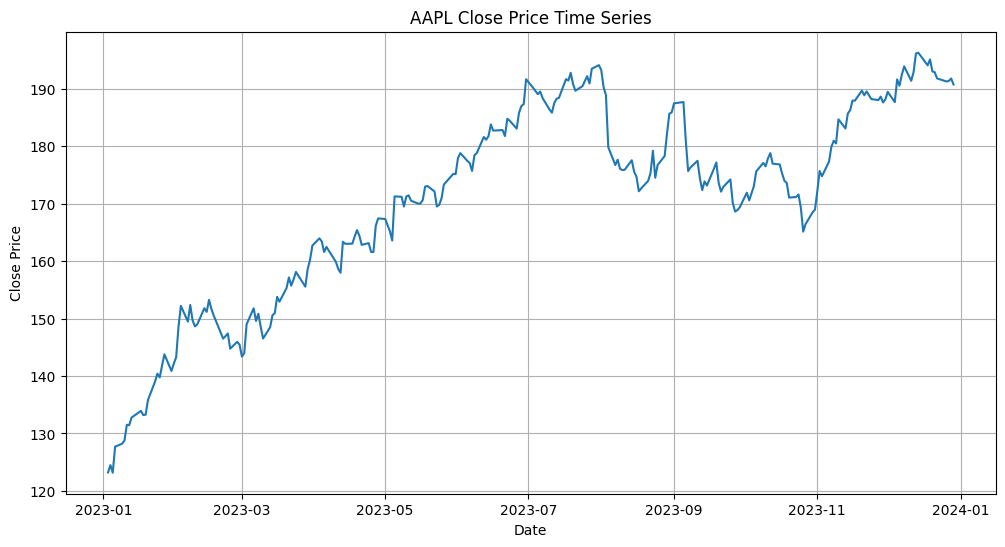

Results of Dickey-Fuller Test:
Test Statistic                  -2.586121
p-value                          0.095900
#Lags Used                       0.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


In [ ]:
# Select the 'Close' price for our time series analysis (Date is already the index).
# Access the 'Close' column using its MultiIndex key and convert to numeric, coercing errors.
ts_data = pd.to_numeric(df[('Close', 'AAPL')], errors='coerce')

# Drop any NaN values that might have resulted from 'coerce' to ensure clean numeric data
ts_data = ts_data.dropna()

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(ts_data)
plt.title('AAPL Close Price Time Series')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

# Check for stationarity using Augmented Dickey-Fuller test
def check_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

check_stationarity(ts_data)

# If the p-value is high, we might need to difference the series.
# For now, let's assume we might need one level of differencing (d=1).

### Fitting the ARIMA Model

To choose the order (p, d, q) for ARIMA, you typically analyze ACF and PACF plots after making the series stationary. For demonstration, we'll start with a common order like `(5,1,0)`, which means 5 autoregressive lags, 1 differencing, and 0 moving average lags. You should refine these parameters based on your data's characteristics.

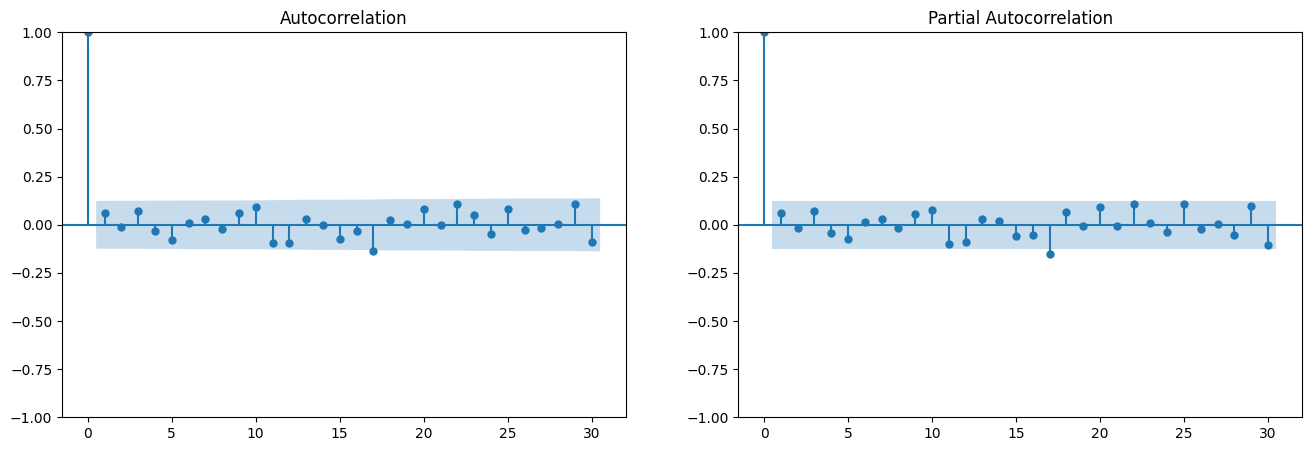

                               SARIMAX Results                                
Dep. Variable:      ('Close', 'AAPL')   No. Observations:                  250
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -537.120
Date:                Wed, 14 Jan 2026   AIC                           1086.241
Time:                        17:45:59   BIC                           1107.345
Sample:                             0   HQIC                          1094.736
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0781      0.065      1.192      0.233      -0.050       0.206
ar.L2         -0.0055      0.070     -0.079      0.937      -0.142       0.131
ar.L3          0.0874      0.068      1.289      0.1

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
# Plot ACF and PACF to help determine p and q (after differencing if needed)
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
plot_acf(ts_data.diff().dropna(), ax=axes[0], lags=30) # Use differenced data for ACF/PACF
plot_pacf(ts_data.diff().dropna(), ax=axes[1], lags=30)
plt.show()

# Fit the ARIMA model
# p: number of AR terms
# d: number of differences
# q: number of MA terms

# Let's start with an example order (p=5, d=1, q=0). This should be tuned.
arima_order = (5, 1, 0)
model = ARIMA(ts_data, order=arima_order)
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

# You can then use the model for forecasting
# For example, to predict the next 10 days:
# forecast_steps = 10
# forecast = model_fit.predict(start=len(ts_data), end=len(ts_data) + forecast_steps - 1)
# print('\nForecasted values:')
# print(forecast)
